In [1]:
import glob
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster import hierarchy
import seaborn as sns
from sklearn import cluster, decomposition, preprocessing

%matplotlib inline

In [6]:
??df.set_index

In [2]:
%ls data

tweet_activity_metrics___mharrison___20201101_20201201_en.csv
tweet_activity_metrics___mharrison___20201201_20210101_en.csv


In [3]:
!pip install jedi==0.17.2

     |████████████████████████████████| 1.4 MB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 29.0 MB/s eta 0:00:01
  Attempting uninstall: parso
    Found existing installation: parso 0.8.2
    Uninstalling parso-0.8.2:
      Successfully uninstalled parso-0.8.2
  Attempting uninstall: jedi
    Found existing installation: jedi 0.18.0
    Uninstalling jedi-0.18.0:
      Successfully uninstalled jedi-0.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.


In [5]:
df = pd.read_csv('data/tweet_activity_metrics___mharrison___20201101_20201201_en.csv',
                 parse_dates=['time'],
                 na_values='-'
                )

df

,Tweet id,Tweet permalink,Tweet text,time,impressions,engagements,engagement rate,retweets,replies,likes,...,promoted hashtag clicks,promoted detail expands,promoted permalink clicks,promoted app opens,promoted app installs,promoted follows,promoted email tweet,promoted dial phone,promoted media views,promoted media engagements
0,1333490536733306887,https://twitter.com/__mharrison__/status/13334...,@arnicas Where do you keep getting nested lists?,2020-11-30 19:18:00+00:00,348.0,3.0,0.008621,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1333489670869553152,https://twitter.com/__mharrison__/status/13334...,@reachdiwakar Virtual training for a client,2020-11-30 19:14:00+00:00,35.0,2.0,0.057143,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1333489505806864384,https://twitter.com/__mharrison__/status/13334...,@juliansequeira @pybites Congrats!😉,2020-11-30 19:14:00+00:00,327.0,2.0,0.006116,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1333454970322993161,https://twitter.com/__mharrison__/status/13334...,@santiagobasulto Don't cringe it is not loose ...,2020-11-30 16:56:00+00:00,151.0,39.0,0.258278,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1333454206594809857,https://twitter.com/__mharrison__/status/13334...,Teaching a ML course for the next two weeks. F...,2020-11-30 16:53:00+00:00,2681.0,164.0,0.061171,0.0,3.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,1323618289960980480,https://twitter.com/__mharrison__/status/13236...,@CoffeyBlog Noah Gift on LinkedIn. (He's not o...,2020-11-03 13:29:00+00:00,18.0,1.0,0.055556,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
355,1323295372567932928,https://twitter.com/__mharrison__/status/13232...,Fun morning. Went to start editing my videos f...,2020-11-02 16:06:00+00:00,1274.0,9.0,0.007064,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,1323264127238692871,https://twitter.com/__mharrison__/status/13232...,@juliansequeira Glad that the phone is conside...,2020-11-02 14:02:00+00:00,596.0,14.0,0.023490,0.0,1.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357,1322920467418685440,https://twitter.com/__mharrison__/status/13229...,Survived hacktoberfest without a single PR! #b...,2020-11-01 15:16:00+00:00,1685.0,15.0,0.008902,0.0,0.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.dtypes

Tweet id                                      int64
Tweet permalink                              object
Tweet text                                   object
time                            datetime64[ns, UTC]
impressions                                 float64
engagements                                 float64
engagement rate                             float64
retweets                                    float64
replies                                     float64
likes                                       float64
user profile clicks                         float64
url clicks                                  float64
hashtag clicks                              float64
detail expands                              float64
permalink clicks                            float64
app opens                                     int64
app installs                                  int64
follows                                       int64
email tweet                                   int64
dial phone  

## Loading Data

In [10]:
data = [pd.read_csv(f, parse_dates=['time'], na_values='-') for f in glob.glob('data/tweet_activity_metrics*.csv')]

In [18]:
df = pd.concat(data, axis=0, ignore_index=True)

In [52]:
df.head()

,Tweet id,Tweet permalink,Tweet text,time,impressions,engagements,engagement rate,retweets,replies,likes,...,promoted hashtag clicks,promoted detail expands,promoted permalink clicks,promoted app opens,promoted app installs,promoted follows,promoted email tweet,promoted dial phone,promoted media views,promoted media engagements
0,1344646193914134531,https://twitter.com/__mharrison__/status/13446...,@tyler What's the proper ratio of BTC to ETH? 🤔,2020-12-31 14:06:00+00:00,279.0,1.0,0.003584,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1344526148139532290,https://twitter.com/__mharrison__/status/13445...,@_MariaPetrova @louisnicholls_ @profgalloway @...,2020-12-31 06:09:00+00:00,24.0,1.0,0.041667,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1344523800633720832,https://twitter.com/__mharrison__/status/13445...,@_MariaPetrova @louisnicholls_ @profgalloway @...,2020-12-31 06:00:00+00:00,55.0,3.0,0.054545,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1344522745887952896,https://twitter.com/__mharrison__/status/13445...,@svpino Hence my courses in Python and pandas...,2020-12-31 05:56:00+00:00,606.0,16.0,0.026403,0.0,1.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1344519439639740416,https://twitter.com/__mharrison__/status/13445...,@louisnicholls_ I have a discount code that I ...,2020-12-31 05:43:00+00:00,32.0,1.0,0.031250,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleanup

In [62]:
def tweak_twit(df):
    drop_cols = ['Tweet id', 'Tweet permalink', 'permalink clicks', 'app installs', 'app opens', 'email tweet', 'dial phone']    
    return (df
            # Research how to drop columns programmatically based on all NaN or sum 0
            .drop(columns=[c for c in df.columns if 'promoted' in c])
            .drop(columns=drop_cols)
            .rename(columns=lambda col: col.replace(' ', "_"))
            # Accessing column by indexing requires reference to original df's column name syntax
            .assign(is_reply=df['Tweet text'].str.startswith('@'),
                    # Accessing column through lambda function implies access to the intermediate df
                    length=lambda df_: df_.Tweet_text.str.len(),
                    num_words=lambda df_: df_.Tweet_text.str.split().apply(len),
                    is_unicode=lambda df_: df_.Tweet_text.str.encode('ascii', errors='replace').str.decode('ascii') != df_.Tweet_text,
                    hour=lambda df_: df_.time.dt.hour,
                    dom=lambda df_: df_.time.dt.day,
                    dow=lambda df_: df_.time.dt.dayofweek,
                    at_tweet=lambda df_: df_.Tweet_text.str.contains('@'),
                    has_newlines= lambda df_: df_.Tweet_text.str.contains('\n'),
                    num_lines= lambda df_: df_.Tweet_text.str.count('\n')+1,
                    num_mentions=lambda df_: df_.Tweet_text.str.count('@'),
                    has_hashtag=lambda df_: df_.Tweet_text.str.contains('#'),
                   )
            
           )

tweak_twit(df)#.length.hist()

,Tweet_text,time,impressions,engagements,engagement_rate,retweets,replies,likes,user_profile_clicks,url_clicks,...,num_words,is_unicode,hour,dom,dow,at_tweet,has_newlines,num_lines,num_mentions,has_hashtag
0,@tyler What's the proper ratio of BTC to ETH? 🤔,2020-12-31 14:06:00+00:00,279.0,1.0,0.003584,0.0,0.0,0.0,0.0,0.0,...,10,True,14,31,3,True,False,1,1,False
1,@_MariaPetrova @louisnicholls_ @profgalloway @...,2020-12-31 06:09:00+00:00,24.0,1.0,0.041667,0.0,0.0,0.0,0.0,0.0,...,26,False,6,31,3,True,False,1,4,False
2,@_MariaPetrova @louisnicholls_ @profgalloway @...,2020-12-31 06:00:00+00:00,55.0,3.0,0.054545,0.0,1.0,1.0,1.0,0.0,...,30,False,6,31,3,True,False,1,4,False
3,@svpino Hence my courses in Python and pandas...,2020-12-31 05:56:00+00:00,606.0,16.0,0.026403,0.0,1.0,5.0,7.0,0.0,...,8,False,5,31,3,True,False,1,1,False
4,@louisnicholls_ I have a discount code that I ...,2020-12-31 05:43:00+00:00,32.0,1.0,0.031250,0.0,0.0,1.0,0.0,0.0,...,29,False,5,31,3,True,False,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,@CoffeyBlog Noah Gift on LinkedIn. (He's not o...,2020-11-03 13:29:00+00:00,18.0,1.0,0.055556,0.0,0.0,1.0,0.0,0.0,...,9,False,13,3,1,True,False,1,1,False
743,Fun morning. Went to start editing my videos f...,2020-11-02 16:06:00+00:00,1274.0,9.0,0.007064,0.0,0.0,0.0,3.0,0.0,...,29,True,16,2,0,True,False,1,1,False
744,@juliansequeira Glad that the phone is conside...,2020-11-02 14:02:00+00:00,596.0,14.0,0.023490,0.0,1.0,8.0,1.0,0.0,...,12,True,14,2,0,True,False,1,1,False
745,Survived hacktoberfest without a single PR! #b...,2020-11-01 15:16:00+00:00,1685.0,15.0,0.008902,0.0,0.0,11.0,1.0,0.0,...,7,False,15,1,6,False,False,1,0,True


In [40]:
df.shape

(747, 40)

In [41]:
df.isna().sum()

Tweet id                          0
Tweet permalink                   0
Tweet text                        0
time                              0
impressions                       0
engagements                       0
engagement rate                   0
retweets                          0
replies                           0
likes                             0
user profile clicks               0
url clicks                        0
hashtag clicks                    0
detail expands                    0
permalink clicks                  0
app opens                         0
app installs                      0
follows                           0
email tweet                       0
dial phone                        0
media views                       0
media engagements                 0
promoted impressions            747
promoted engagements            747
promoted engagement rate        747
promoted retweets               747
promoted replies                747
promoted likes              

## Correlations

In [43]:
(tweak_twit(df)
 .corr()
 .style.background_gradient(cmap='RdBu', vmin=-1, vmax=1)
)

,impressions,engagements,engagement_rate,retweets,replies,likes,user_profile_clicks,url_clicks,hashtag_clicks,detail_expands,follows,media_views,media_engagements,is_reply,length,num_words,is_unicode,hour,dom,dow,at_tweet,has_newlines,num_lines,num_mentions,has_hashtag
impressions,1.000000,0.827564,0.262739,0.646588,0.748492,0.843670,0.861190,0.261649,0.014803,0.771076,0.056573,0.800535,0.800553,-0.224969,0.091588,0.066420,0.074142,-0.027006,-0.005651,-0.008762,-0.187911,0.062622,0.071228,-0.169822,-0.000334
engagements,0.827564,1.000000,0.389289,0.403458,0.694654,0.829135,0.831700,0.219504,-0.006295,0.673311,0.002519,0.996940,0.996942,0.009549,0.046799,0.033863,-0.036388,0.006355,-0.012013,-0.015480,0.010725,0.002967,0.006720,-0.022567,-0.015902
engagement_rate,0.262739,0.389289,1.000000,0.144685,0.328662,0.292362,0.282297,0.211173,-0.008947,0.311635,-0.012695,0.382072,0.382068,0.091152,0.145411,0.107268,-0.093704,-0.007829,0.038027,0.033056,0.086336,0.061068,0.035653,0.088543,-0.030650
retweets,0.646588,0.403458,0.144685,1.000000,0.554063,0.640660,0.489787,0.248908,-0.018824,0.597519,0.084914,0.364088,0.364102,-0.234793,0.119798,0.086402,0.087527,0.015739,0.032744,-0.053585,-0.185980,0.138677,0.118127,-0.153528,-0.030197
replies,0.748492,0.694654,0.328662,0.554063,1.000000,0.737567,0.718151,0.118624,0.010272,0.783300,0.010793,0.659648,0.659634,-0.043930,0.112371,0.112313,0.029721,0.029023,0.054804,-0.046517,-0.043685,0.032300,0.035948,-0.049456,-0.031247
likes,0.843670,0.829135,0.292362,0.640660,0.737567,1.000000,0.837244,0.245760,0.028712,0.721132,0.019880,0.805033,0.805048,-0.146041,0.131497,0.110814,0.058172,0.034042,-0.027630,-0.034922,-0.118698,0.070164,0.088493,-0.122090,0.008394
user_profile_clicks,0.861190,0.831700,0.282297,0.489787,0.718151,0.837244,1.000000,0.270612,0.001832,0.761749,0.079265,0.802287,0.802291,-0.068729,0.097544,0.091457,0.032035,0.008387,-0.014499,-0.037249,-0.040868,0.046063,0.057891,-0.059478,-0.014753
url_clicks,0.261649,0.219504,0.211173,0.248908,0.118624,0.245760,0.270612,1.000000,0.046050,0.153191,0.175754,0.191412,0.191425,-0.108693,0.115460,0.068785,-0.032912,-0.033164,-0.065851,-0.050717,-0.067613,0.210084,0.111384,-0.061703,0.063213
hashtag_clicks,0.014803,-0.006295,-0.008947,-0.018824,0.010272,0.028712,0.001832,0.046050,1.000000,0.012351,-0.006031,-0.009621,-0.009614,-0.162532,0.151595,0.180425,0.080124,-0.027468,-0.104644,0.097781,-0.155098,0.122332,0.148003,-0.118230,0.541448
detail_expands,0.771076,0.673311,0.311635,0.597519,0.783300,0.721132,0.761749,0.153191,0.012351,1.000000,0.000924,0.620730,0.620742,-0.206872,0.104986,0.100715,0.079747,0.011083,0.032244,-0.042374,-0.200059,0.065146,0.065543,-0.166494,-0.012264


<AxesSubplot:xlabel='impressions', ylabel='engagements'>

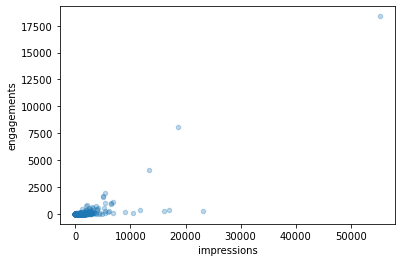

In [44]:
(tweak_twit(df)
 .plot.scatter(x='impressions', y='engagements', alpha=.3)
)

(0.0, 500.0)

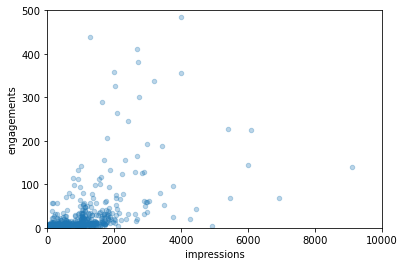

In [46]:
ax = (tweak_twit(df)
      .plot.scatter(x='impressions', y='engagements', alpha=.3)
     )
ax.set_xlim(0,10000)
ax.set_ylim(0,500)

In [56]:
(tweak_twit(df)
 .query('impressions > 8000')
 .corr(method='spearman')
 .style.background_gradient(cmap='RdBu', vmin=-1, vmax=1)
)

,impressions,engagements,engagement_rate,retweets,replies,likes,user_profile_clicks,url_clicks,hashtag_clicks,detail_expands,permalink_clicks,follows,media_views,media_engagements,is_reply,length,num_words,is_unicode,hour,dom,dow,at_tweet,has_newlines,num_lines,num_mentions,has_hashtag
impressions,1.000000,0.700000,0.383333,0.405096,0.451887,0.666667,0.583333,0.626680,nan,0.450000,nan,nan,0.544581,0.544581,0.173205,-0.166667,-0.133892,0.173205,0.404069,0.058578,0.212814,0.173205,0.000000,0.000000,0.009129,nan
engagements,0.700000,1.000000,0.900000,0.244745,0.728040,0.733333,0.416667,0.557048,nan,0.533333,nan,nan,0.841625,0.841625,0.433013,-0.250000,-0.142261,-0.173205,0.052705,-0.167365,-0.306452,0.259808,-0.273861,-0.273861,0.036515,nan
engagement_rate,0.383333,0.900000,1.000000,0.025318,0.560674,0.516667,0.116667,0.417786,nan,0.383333,nan,nan,0.821822,0.821822,0.433013,-0.250000,-0.142261,-0.346410,-0.061489,-0.259416,-0.417116,0.259808,-0.273861,-0.273861,0.036515,nan
retweets,0.405096,0.244745,0.025318,1.000000,0.572054,0.725797,0.489491,0.326146,nan,0.582325,nan,nan,0.030083,0.030083,-0.306970,0.270064,0.279671,0.438529,0.600481,0.398319,-0.349151,-0.306970,0.000000,0.000000,-0.420648,nan
replies,0.451887,0.728040,0.560674,0.572054,1.000000,0.778249,0.460255,0.214139,nan,0.728040,nan,nan,0.487207,0.487207,0.260897,0.150629,0.218487,0.043483,0.255807,-0.273109,-0.581282,-0.043483,-0.481267,-0.481267,-0.128338,nan
likes,0.666667,0.733333,0.516667,0.725797,0.778249,1.000000,0.550000,0.678903,nan,0.433333,nan,nan,0.643596,0.643596,0.346410,-0.050000,-0.025105,0.000000,0.412853,0.066946,-0.331990,0.259808,-0.136931,-0.136931,0.082158,nan
user_profile_clicks,0.583333,0.416667,0.116667,0.489491,0.460255,0.550000,1.000000,0.635383,nan,0.400000,nan,nan,0.237635,0.237635,0.000000,0.400000,0.476992,0.346410,0.079057,0.267785,-0.366040,0.259808,0.410792,0.410792,0.127802,nan
url_clicks,0.626680,0.557048,0.417786,0.326146,0.214139,0.678903,0.635383,1.000000,nan,0.008704,nan,nan,0.692898,0.692898,0.407040,-0.052223,-0.034962,-0.180907,0.206431,0.209769,-0.124475,0.678401,0.429058,0.429058,0.452895,nan
hashtag_clicks,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
detail_expands,0.450000,0.533333,0.383333,0.582325,0.728040,0.433333,0.400000,0.008704,nan,1.000000,nan,nan,0.188128,0.188128,-0.259808,0.200000,0.301258,0.259808,0.333796,-0.058578,-0.434141,-0.519615,-0.410792,-0.410792,-0.620752,nan


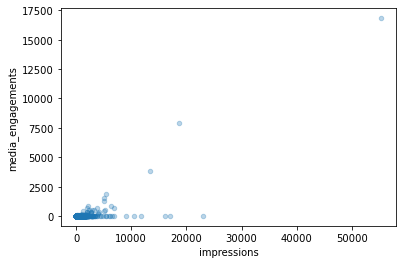

In [54]:
ax = (tweak_twit(df)
      .plot.scatter(x='impressions', y='media_engagements', alpha=.3)
     )
# ax.set_xlim(0,10000)
# ax.set_ylim(0,500)

## More Exploring

In [61]:
(tweak_twit(df)
 .query('likes > 50')
 .corr(method='spearman')
 .style.background_gradient(cmap='RdBu', vmin=-1, vmax=1)
)

,impressions,engagements,engagement_rate,retweets,replies,likes,user_profile_clicks,url_clicks,hashtag_clicks,detail_expands,permalink_clicks,follows,media_views,media_engagements,is_reply,length,num_words,is_unicode,hour,dom,dow,at_tweet,has_newlines,num_lines,num_mentions,has_hashtag
impressions,1.000000,1.000000,1.000000,0.500000,1.000000,0.500000,1.000000,1.000000,nan,1.000000,nan,nan,1.000000,1.000000,0.866025,-0.500000,-0.500000,-0.866025,0.000000,0.500000,-0.866025,nan,-0.866025,-0.866025,nan,nan
engagements,1.000000,1.000000,1.000000,0.500000,1.000000,0.500000,1.000000,1.000000,nan,1.000000,nan,nan,1.000000,1.000000,0.866025,-0.500000,-0.500000,-0.866025,0.000000,0.500000,-0.866025,nan,-0.866025,-0.866025,nan,nan
engagement_rate,1.000000,1.000000,1.000000,0.500000,1.000000,0.500000,1.000000,1.000000,nan,1.000000,nan,nan,1.000000,1.000000,0.866025,-0.500000,-0.500000,-0.866025,0.000000,0.500000,-0.866025,nan,-0.866025,-0.866025,nan,nan
retweets,0.500000,0.500000,0.500000,1.000000,0.500000,1.000000,0.500000,0.500000,nan,0.500000,nan,nan,0.500000,0.500000,0.000000,0.500000,0.500000,0.000000,0.866025,-0.500000,0.000000,nan,0.000000,0.000000,nan,nan
replies,1.000000,1.000000,1.000000,0.500000,1.000000,0.500000,1.000000,1.000000,nan,1.000000,nan,nan,1.000000,1.000000,0.866025,-0.500000,-0.500000,-0.866025,0.000000,0.500000,-0.866025,nan,-0.866025,-0.866025,nan,nan
likes,0.500000,0.500000,0.500000,1.000000,0.500000,1.000000,0.500000,0.500000,nan,0.500000,nan,nan,0.500000,0.500000,0.000000,0.500000,0.500000,0.000000,0.866025,-0.500000,0.000000,nan,0.000000,0.000000,nan,nan
user_profile_clicks,1.000000,1.000000,1.000000,0.500000,1.000000,0.500000,1.000000,1.000000,nan,1.000000,nan,nan,1.000000,1.000000,0.866025,-0.500000,-0.500000,-0.866025,0.000000,0.500000,-0.866025,nan,-0.866025,-0.866025,nan,nan
url_clicks,1.000000,1.000000,1.000000,0.500000,1.000000,0.500000,1.000000,1.000000,nan,1.000000,nan,nan,1.000000,1.000000,0.866025,-0.500000,-0.500000,-0.866025,0.000000,0.500000,-0.866025,nan,-0.866025,-0.866025,nan,nan
hashtag_clicks,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
detail_expands,1.000000,1.000000,1.000000,0.500000,1.000000,0.500000,1.000000,1.000000,nan,1.000000,nan,nan,1.000000,1.000000,0.866025,-0.500000,-0.500000,-0.866025,0.000000,0.500000,-0.866025,nan,-0.866025,-0.866025,nan,nan


<AxesSubplot:xlabel='impressions', ylabel='likes'>

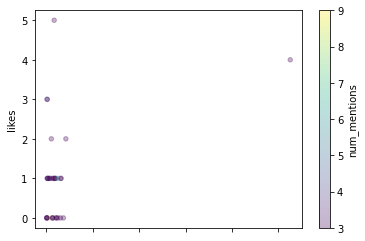

In [64]:
(tweak_twit(df)
 .query('num_mentions > 2')
 .plot.scatter(x='impressions', y='likes', c='num_mentions', cmap='viridis', alpha=.3)
)

<AxesSubplot:xlabel='impressions', ylabel='hour'>

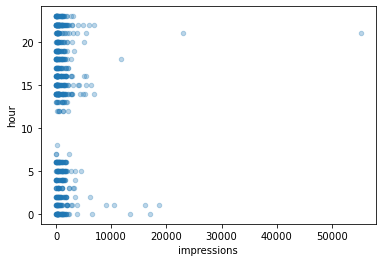

In [65]:
(tweak_twit(df)
#  .query('num_mentions > 2')
 .plot.scatter(x='impressions', y='hour', alpha=.3)
)

<AxesSubplot:xlabel='hour'>

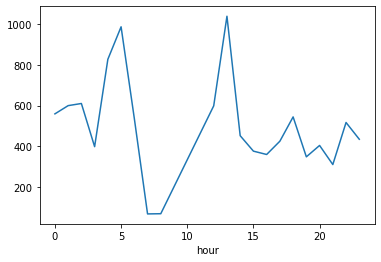

In [69]:
(tweak_twit(df)
 .groupby('hour')
 .impressions
 .median()
 .plot()
)

(0.0, 5000.0)

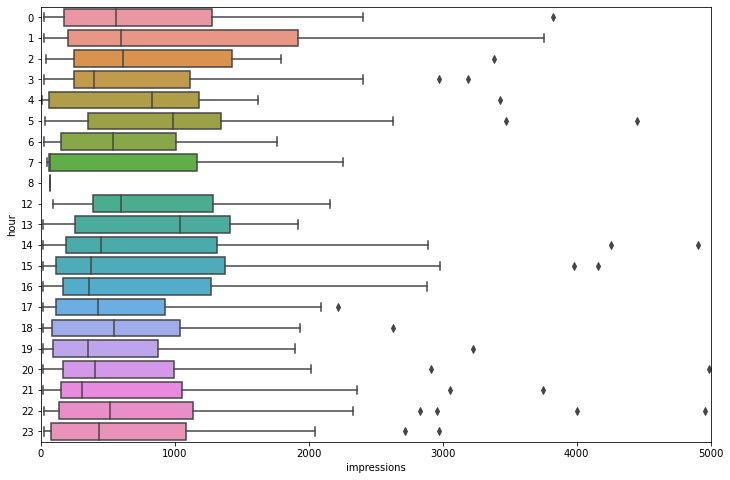

In [78]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(x='impressions', y='hour', data=tweak_twit(df), orient='h')
ax.set_xlim(0,5000)

(0.0, 50.0)

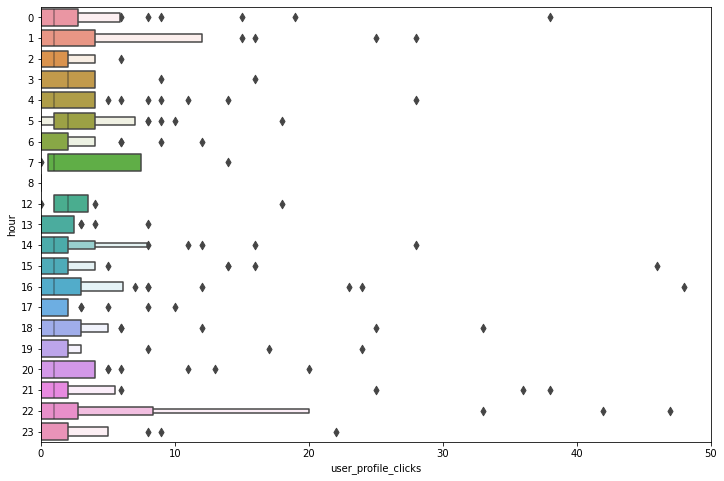

In [80]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxenplot(x='user_profile_clicks', y='hour', data=tweak_twit(df), orient='h')
ax.set_xlim(0,50)

<AxesSubplot:xlabel='impressions', ylabel='user_profile_clicks'>

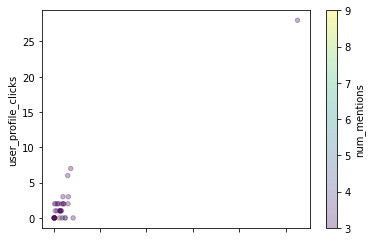

In [81]:
(tweak_twit(df)
 .query('num_mentions > 2')
 .plot.scatter(x='impressions', y='user_profile_clicks',
               c='num_mentions', cmap='viridis',
               alpha=.3)
)

In [87]:
(tweak_twit(df)
 # pd.cut makes bins of equal width (unless you manually override it as done here)
 .assign(profile_bin=lambda df_: pd.cut(df_.user_profile_clicks, bins=[1,10,50,100,500]))
 # pd.qcut attempts to make quantiles with the same number of observations in each bin
#  .assign(profile_bin=lambda df_: pd.qcut(df_.user_profile_clicks, q=2))
 .groupby('profile_bin')
 .mean()
 .T
 .style.background_gradient(cmap='RdBu', axis=1) 

)

profile_bin,"(1, 10]","(10, 50]","(50, 100]","(100, 500]"
impressions,1122.763713,4157.586957,8661.125000,29195.500000
engagements,40.860759,495.934783,874.250000,9357.000000
engagement_rate,0.036128,0.094169,0.105052,0.219331
retweets,0.189873,1.152174,1.625000,4.000000
replies,0.632911,2.173913,3.125000,15.500000
likes,3.434599,14.456522,13.750000,133.000000
user_profile_clicks,3.801688,21.826087,67.625000,268.500000
url_clicks,6.510549,13.891304,33.125000,42.500000
hashtag_clicks,0.080169,0.065217,0.000000,0.000000
detail_expands,8.523207,76.782609,96.000000,485.500000


## Time Series

<AxesSubplot:xlabel='time'>

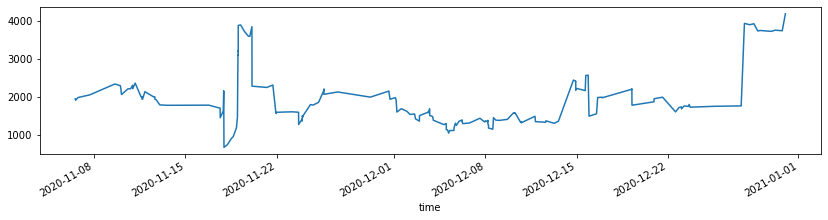

In [97]:
fig, ax = plt.subplots(figsize=(14,3))
(tweak_twit(df)
 .query('at_tweet != True')
 .set_index('time')
 .sort_index()
 .impressions
 # Take the rolling X day average
 .rolling(10)
 # Group by X and take average. 'd' == day
#  .resample('d')
 .mean()
 .plot(ax=ax)
)


## Merging

In [101]:
new_followers = [0, 133, 132, 78, 201, 89, 178, 322, 212, 110, 100, 210, 140]
followers = pd.Series(new_followers, index=pd.date_range('dec 2019', periods=13, freq='m', tz='UTC')).cumsum() + 4400
followers

2019-12-31 00:00:00+00:00    4400
2020-01-31 00:00:00+00:00    4533
2020-02-29 00:00:00+00:00    4665
2020-03-31 00:00:00+00:00    4743
2020-04-30 00:00:00+00:00    4944
2020-05-31 00:00:00+00:00    5033
2020-06-30 00:00:00+00:00    5211
2020-07-31 00:00:00+00:00    5533
2020-08-31 00:00:00+00:00    5745
2020-09-30 00:00:00+00:00    5855
2020-10-31 00:00:00+00:00    5955
2020-11-30 00:00:00+00:00    6165
2020-12-31 00:00:00+00:00    6305
Freq: M, dtype: int64

<AxesSubplot:>

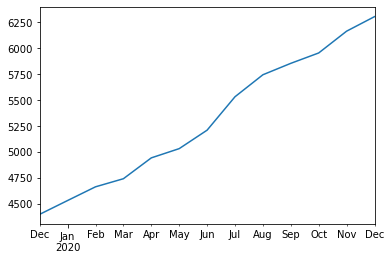

In [102]:
followers.plot()

In [112]:
complete_follows = (followers
                     .resample('d')
                     .interpolate()
                     .rename('followers')
                     .to_frame()
                     .merge((tweak_twit(df)
                             .time
                             .sort_values()
                             .drop_duplicates()
                             .to_frame()
                            ),
                            left_index=True, right_on='time', how='outer'
                           )
                     .set_index('time')
                     .sort_index()
                     .interpolate(method='time')
#                      .plot()
                    )

In [113]:
(tweak_twit(df)
 .merge(complete_follows, left_on='time', right_index=True, how='left')
)

,Tweet_text,time,impressions,engagements,engagement_rate,retweets,replies,likes,user_profile_clicks,url_clicks,...,is_unicode,hour,dom,dow,at_tweet,has_newlines,num_lines,num_mentions,has_hashtag,followers
0,@tyler What's the proper ratio of BTC to ETH? 🤔,2020-12-31 14:06:00+00:00,279.0,1.0,0.003584,0.0,0.0,0.0,0.0,0.0,...,True,14,31,3,True,False,1,1,False,6305.000000
1,@_MariaPetrova @louisnicholls_ @profgalloway @...,2020-12-31 06:09:00+00:00,24.0,1.0,0.041667,0.0,0.0,0.0,0.0,0.0,...,False,6,31,3,True,False,1,4,False,6305.000000
2,@_MariaPetrova @louisnicholls_ @profgalloway @...,2020-12-31 06:00:00+00:00,55.0,3.0,0.054545,0.0,1.0,1.0,1.0,0.0,...,False,6,31,3,True,False,1,4,False,6305.000000
3,@svpino Hence my courses in Python and pandas...,2020-12-31 05:56:00+00:00,606.0,16.0,0.026403,0.0,1.0,5.0,7.0,0.0,...,False,5,31,3,True,False,1,1,False,6305.000000
4,@louisnicholls_ I have a discount code that I ...,2020-12-31 05:43:00+00:00,32.0,1.0,0.031250,0.0,0.0,1.0,0.0,0.0,...,False,5,31,3,True,False,1,1,False,6305.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,@CoffeyBlog Noah Gift on LinkedIn. (He's not o...,2020-11-03 13:29:00+00:00,18.0,1.0,0.055556,0.0,0.0,1.0,0.0,0.0,...,False,13,3,1,True,False,1,1,False,5979.932639
743,Fun morning. Went to start editing my videos f...,2020-11-02 16:06:00+00:00,1274.0,9.0,0.007064,0.0,0.0,0.0,3.0,0.0,...,True,16,2,0,True,False,1,1,False,5973.695833
744,@juliansequeira Glad that the phone is conside...,2020-11-02 14:02:00+00:00,596.0,14.0,0.023490,0.0,1.0,8.0,1.0,0.0,...,True,14,2,0,True,False,1,1,False,5973.093056
745,Survived hacktoberfest without a single PR! #b...,2020-11-01 15:16:00+00:00,1685.0,15.0,0.008902,0.0,0.0,11.0,1.0,0.0,...,False,15,1,6,False,False,1,0,True,5966.452778


<AxesSubplot:xlabel='time'>

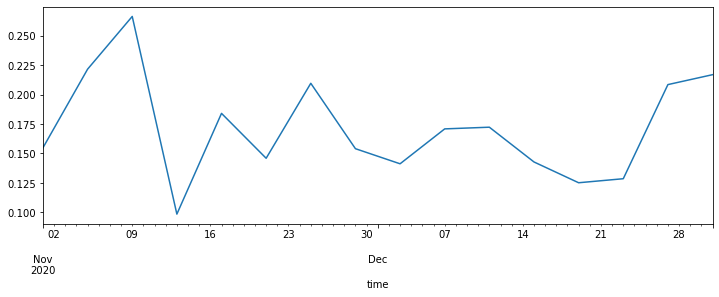

In [120]:
fig, ax = plt.subplots(figsize=(12,4))
(tweak_twit(df)
 .merge(complete_follows, left_on='time', right_index=True, how='left')
 .set_index('time')
 .sort_index()
 .assign(imp_ratio=lambda df_: df_.impressions / df_.followers)
 .imp_ratio
#  .rolling(20)
#  .resample('w')
 .resample('4d')
 .mean()
 .plot()
)

In [123]:
# UPDATE the tweak_twit function to include the merge operations we stepped iteratively in the cells above

def tweak_twit(df):
    drop_cols = ['Tweet id', 'Tweet permalink', 'permalink clicks', 'app installs', 'app opens', 'email tweet', 'dial phone']    
    df2 = (df
            # Research how to drop columns programmatically based on all NaN or sum 0
            .drop(columns=[c for c in df.columns if 'promoted' in c])
            .drop(columns=drop_cols)
            .rename(columns=lambda col: col.replace(' ', "_"))
            # Accessing column by indexing requires reference to original df's column name syntax
            .assign(is_reply=df['Tweet text'].str.startswith('@'),
                    # Accessing column through lambda function implies access to the intermediate df
                    length=lambda df_: df_.Tweet_text.str.len(),
                    num_words=lambda df_: df_.Tweet_text.str.split().apply(len),
                    is_unicode=lambda df_: df_.Tweet_text.str.encode('ascii', errors='replace').str.decode('ascii') != df_.Tweet_text,
                    hour=lambda df_: df_.time.dt.hour,
                    dom=lambda df_: df_.time.dt.day,
                    dow=lambda df_: df_.time.dt.dayofweek,
                    at_tweet=lambda df_: df_.Tweet_text.str.contains('@'),
                    has_newlines= lambda df_: df_.Tweet_text.str.contains('\n'),
                    num_lines= lambda df_: df_.Tweet_text.str.count('\n')+1,
                    num_mentions=lambda df_: df_.Tweet_text.str.count('@'),
                    has_hashtag=lambda df_: df_.Tweet_text.str.contains('#'),
                   )
            
           )
    
    new_followers = [0, 133, 132, 78, 201, 89, 178, 322, 212, 110, 100, 210, 140]
    followers = pd.Series(new_followers, index=pd.date_range('dec 2019', periods=13, freq='m', tz='UTC')).cumsum() + 4400
    complete_follows = (followers
                         .resample('d')
                         .interpolate()
                         .rename('followers')
                         .to_frame()
                         .merge(df2
                                 .time
                                 .sort_values()
                                 .drop_duplicates()
                                 .to_frame(), left_index=True, right_on='time', how='outer'
                               )
                         .set_index('time')
                         .sort_index()
                         .interpolate(method='time')
                        )
    return (df2
            .merge(complete_follows, left_on='time', right_index=True, how='left')
           )

tweak_twit(df)

,Tweet_text,time,impressions,engagements,engagement_rate,retweets,replies,likes,user_profile_clicks,url_clicks,...,is_unicode,hour,dom,dow,at_tweet,has_newlines,num_lines,num_mentions,has_hashtag,followers
0,@tyler What's the proper ratio of BTC to ETH? 🤔,2020-12-31 14:06:00+00:00,279.0,1.0,0.003584,0.0,0.0,0.0,0.0,0.0,...,True,14,31,3,True,False,1,1,False,6305.000000
1,@_MariaPetrova @louisnicholls_ @profgalloway @...,2020-12-31 06:09:00+00:00,24.0,1.0,0.041667,0.0,0.0,0.0,0.0,0.0,...,False,6,31,3,True,False,1,4,False,6305.000000
2,@_MariaPetrova @louisnicholls_ @profgalloway @...,2020-12-31 06:00:00+00:00,55.0,3.0,0.054545,0.0,1.0,1.0,1.0,0.0,...,False,6,31,3,True,False,1,4,False,6305.000000
3,@svpino Hence my courses in Python and pandas...,2020-12-31 05:56:00+00:00,606.0,16.0,0.026403,0.0,1.0,5.0,7.0,0.0,...,False,5,31,3,True,False,1,1,False,6305.000000
4,@louisnicholls_ I have a discount code that I ...,2020-12-31 05:43:00+00:00,32.0,1.0,0.031250,0.0,0.0,1.0,0.0,0.0,...,False,5,31,3,True,False,1,1,False,6305.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,@CoffeyBlog Noah Gift on LinkedIn. (He's not o...,2020-11-03 13:29:00+00:00,18.0,1.0,0.055556,0.0,0.0,1.0,0.0,0.0,...,False,13,3,1,True,False,1,1,False,5979.932639
743,Fun morning. Went to start editing my videos f...,2020-11-02 16:06:00+00:00,1274.0,9.0,0.007064,0.0,0.0,0.0,3.0,0.0,...,True,16,2,0,True,False,1,1,False,5973.695833
744,@juliansequeira Glad that the phone is conside...,2020-11-02 14:02:00+00:00,596.0,14.0,0.023490,0.0,1.0,8.0,1.0,0.0,...,True,14,2,0,True,False,1,1,False,5973.093056
745,Survived hacktoberfest without a single PR! #b...,2020-11-01 15:16:00+00:00,1685.0,15.0,0.008902,0.0,0.0,11.0,1.0,0.0,...,False,15,1,6,False,False,1,0,True,5966.452778


## Machine Learning - Clustering

In [128]:
cleaned = (tweak_twit(df)
           .drop(columns=['Tweet_text', 'time'])
          )

X_std = pd.DataFrame(preprocessing.StandardScaler().fit_transform(cleaned),
                     columns=cleaned.columns
                    )
X_std.head()

,impressions,engagements,engagement_rate,retweets,replies,likes,user_profile_clicks,url_clicks,hashtag_clicks,detail_expands,...,is_unicode,hour,dom,dow,at_tweet,has_newlines,num_lines,num_mentions,has_hashtag,followers
0,-0.293724,-0.106999,-0.546605,-0.255254,-0.440065,-0.301449,-0.228467,-0.238086,-0.116403,-0.224881,...,1.059320,0.156310,1.924743,0.227891,0.633641,-0.270695,-0.196739,-0.026807,-0.214985,1.606594
1,-0.387981,-0.106999,0.081880,-0.255254,-0.440065,-0.301449,-0.228467,-0.238086,-0.116403,-0.224881,...,-0.944002,-0.864572,1.924743,0.227891,0.633641,-0.270695,-0.196739,3.310676,-0.214985,1.606594
2,-0.376522,-0.104373,0.294422,-0.255254,0.208315,-0.210097,-0.173520,-0.238086,-0.116403,-0.246947,...,-0.944002,-0.864572,1.924743,0.227891,0.633641,-0.270695,-0.196739,3.310676,-0.214985,1.606594
3,-0.172852,-0.087301,-0.170026,-0.255254,0.208315,0.155310,0.156160,-0.238086,-0.116403,-0.180750,...,-0.944002,-0.992182,1.924743,0.227891,0.633641,-0.270695,-0.196739,-0.026807,-0.214985,1.606594
4,-0.385024,-0.106999,-0.090029,-0.255254,-0.440065,-0.210097,-0.228467,-0.238086,-0.116403,-0.246947,...,-0.944002,-0.992182,1.924743,0.227891,0.633641,-0.270695,-0.196739,-0.026807,-0.214985,1.606594


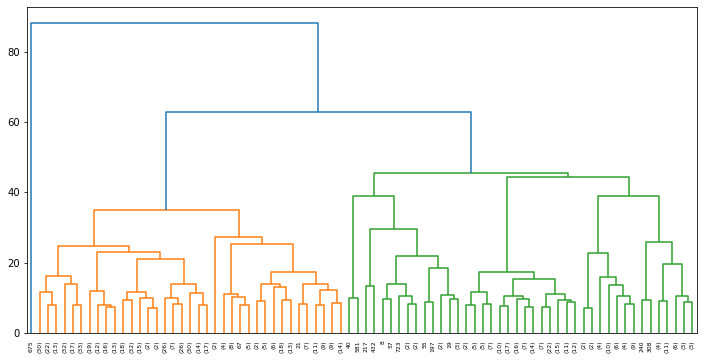

In [134]:
fig, ax = plt.subplots(figsize=(12,6))
_ = hierarchy.dendrogram(hierarchy.linkage(X_std, method='ward'), truncate_mode='lastp', p=80)

In [135]:
clus = cluster.AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')
clus.fit(X_std)

AgglomerativeClustering(n_clusters=8)

In [138]:
(tweak_twit(df)
 .assign(label=clus.fit_predict(X_std))
 .groupby('label')
 .mean()
 .T
 .style.background_gradient('RdBu', axis=1)
)

label,0,1,2,3,4,5,6,7
impressions,8950.000000,1063.655172,749.121739,481.363636,1637.320000,902.027027,4027.500000,55205.000000
engagements,1143.705882,25.172414,89.869565,9.037879,52.686667,27.162162,119.500000,18377.000000
engagement_rate,0.119666,0.027651,0.074537,0.026548,0.025137,0.036508,0.021859,0.332887
retweets,3.529412,0.103448,0.052174,0.032828,0.326667,0.243243,1.500000,8.000000
replies,4.411765,0.413793,0.747826,0.484848,0.620000,0.513514,1.000000,28.000000
likes,24.294118,3.517241,2.808696,1.207071,5.006667,3.648649,7.500000,248.000000
user_profile_clicks,41.000000,2.965517,3.591304,1.883838,4.120000,1.648649,32.000000,421.000000
url_clicks,26.529412,8.517241,8.947826,0.608586,3.486667,12.297297,64.500000,85.000000
hashtag_clicks,0.000000,0.931034,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
detail_expands,178.352941,8.620690,5.695652,2.424242,16.240000,6.270270,12.000000,771.000000


In [142]:
# Look into the tweets from a specific cluster
(tweak_twit(df)
 .assign(label=clus.fit_predict(X_std))
 .query('label == 2')
)

,Tweet_text,time,impressions,engagements,engagement_rate,retweets,replies,likes,user_profile_clicks,url_clicks,...,hour,dom,dow,at_tweet,has_newlines,num_lines,num_mentions,has_hashtag,followers,label
1,@_MariaPetrova @louisnicholls_ @profgalloway @...,2020-12-31 06:09:00+00:00,24.0,1.0,0.041667,0.0,0.0,0.0,0.0,0.0,...,6,31,3,True,False,1,4,False,6305.000000,2
2,@_MariaPetrova @louisnicholls_ @profgalloway @...,2020-12-31 06:00:00+00:00,55.0,3.0,0.054545,0.0,1.0,1.0,1.0,0.0,...,6,31,3,True,False,1,4,False,6305.000000,2
4,@louisnicholls_ I have a discount code that I ...,2020-12-31 05:43:00+00:00,32.0,1.0,0.031250,0.0,0.0,1.0,0.0,0.0,...,5,31,3,True,False,1,1,False,6305.000000,2
5,@louisnicholls_ The service providers are neve...,2020-12-31 05:42:00+00:00,326.0,6.0,0.018405,0.0,2.0,1.0,0.0,0.0,...,5,31,3,True,False,1,1,False,6305.000000,2
11,@anthilemoon @mariepoulin You are the average ...,2020-12-31 01:15:00+00:00,636.0,8.0,0.012579,0.0,1.0,2.0,1.0,0.0,...,1,31,3,True,False,1,2,False,6305.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,"Yeah, remove the ""any young programmer"". Peopl...",2020-11-10 01:28:00+00:00,2057.0,29.0,0.014098,0.0,0.0,7.0,0.0,0.0,...,1,10,1,False,False,1,0,False,6025.427778,2
694,@yarkot @dabeaz For a long time I resisted a d...,2020-11-09 16:55:00+00:00,50.0,1.0,0.020000,0.0,0.0,1.0,0.0,0.0,...,16,9,0,True,False,1,2,False,6022.934028,2
721,@mariaKhalusova REPLs are great. My point for ...,2020-11-05 15:48:00+00:00,91.0,6.0,0.065934,0.0,1.0,1.0,1.0,0.0,...,15,5,3,True,False,1,1,False,5994.608333,2
726,@doughellmann @raymondh Most of the people I'm...,2020-11-04 17:30:00+00:00,120.0,7.0,0.058333,0.0,1.0,1.0,2.0,0.0,...,17,4,2,True,False,1,2,False,5988.104167,2


<AxesSubplot:xlabel='engagements', ylabel='impressions'>

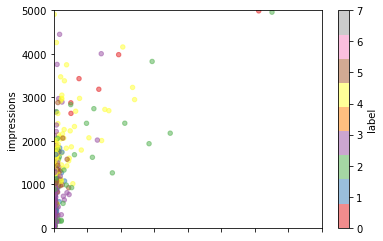

In [146]:
(tweak_twit(df)
 .assign(label=clus.fit_predict(X_std))
 .plot.scatter(x='engagements', y='impressions',
               c='label', cmap='Set1', alpha=.5,
               xlim=(0,2000), ylim=(0,5000)
              )
)

## Machine Learning - PCA

In [147]:
cleaned = (tweak_twit(df)
           .drop(columns=['Tweet_text', 'time'])
          )

X_std = pd.DataFrame(preprocessing.StandardScaler().fit_transform(cleaned),
                     columns=cleaned.columns
                    )
X_std.head()

,impressions,engagements,engagement_rate,retweets,replies,likes,user_profile_clicks,url_clicks,hashtag_clicks,detail_expands,...,is_unicode,hour,dom,dow,at_tweet,has_newlines,num_lines,num_mentions,has_hashtag,followers
0,-0.293724,-0.106999,-0.546605,-0.255254,-0.440065,-0.301449,-0.228467,-0.238086,-0.116403,-0.224881,...,1.059320,0.156310,1.924743,0.227891,0.633641,-0.270695,-0.196739,-0.026807,-0.214985,1.606594
1,-0.387981,-0.106999,0.081880,-0.255254,-0.440065,-0.301449,-0.228467,-0.238086,-0.116403,-0.224881,...,-0.944002,-0.864572,1.924743,0.227891,0.633641,-0.270695,-0.196739,3.310676,-0.214985,1.606594
2,-0.376522,-0.104373,0.294422,-0.255254,0.208315,-0.210097,-0.173520,-0.238086,-0.116403,-0.246947,...,-0.944002,-0.864572,1.924743,0.227891,0.633641,-0.270695,-0.196739,3.310676,-0.214985,1.606594
3,-0.172852,-0.087301,-0.170026,-0.255254,0.208315,0.155310,0.156160,-0.238086,-0.116403,-0.180750,...,-0.944002,-0.992182,1.924743,0.227891,0.633641,-0.270695,-0.196739,-0.026807,-0.214985,1.606594
4,-0.385024,-0.106999,-0.090029,-0.255254,-0.440065,-0.210097,-0.228467,-0.238086,-0.116403,-0.246947,...,-0.944002,-0.992182,1.924743,0.227891,0.633641,-0.270695,-0.196739,-0.026807,-0.214985,1.606594


In [149]:
pca = decomposition.PCA()
X_pca = pca.fit_transform(X_std)

In [152]:
pd.DataFrame(X_pca, columns=[f'PC{n+1}' for n in range(X_pca.shape[1])])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26
0,-0.944461,-1.112903,-0.671036,1.220524,-1.635949,-0.660392,0.271347,-0.287951,0.961086,-0.249867,...,-0.248269,0.032100,0.135825,0.175687,-0.058818,0.022529,-0.003351,0.148913,0.000225,-0.000072
1,-0.868137,-1.667648,2.574126,1.642504,-1.545250,-0.893895,0.990477,0.827221,-0.182721,-0.113480,...,2.136165,0.225284,-0.085497,0.106776,-0.233775,0.072003,-0.146091,-0.168958,0.000930,-0.000320
2,-0.558405,-1.588332,2.879227,1.619424,-1.569133,-1.074532,1.172376,0.939666,-0.242602,-0.130745,...,2.049231,0.121517,-0.480594,-0.129382,-0.179542,0.153222,-0.130416,-0.008861,-0.002083,-0.000262
3,-0.385917,-1.566068,-0.717839,1.799292,-1.662483,-0.416237,-0.076766,0.297912,-0.044904,0.086484,...,-0.304994,0.070905,-0.001276,-0.448909,-0.166266,0.014569,0.020004,0.031372,-0.002542,-0.000339
4,-0.697223,-0.542420,1.339378,1.558256,-1.583345,-1.161791,0.939145,1.055715,-0.603313,-0.565583,...,-0.538553,0.063969,0.225581,0.103938,-0.145642,0.010283,0.003239,-0.009363,0.002613,-0.000346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,-0.748715,-0.970178,0.126564,-1.425732,1.527895,0.916179,-0.983648,-0.092294,-0.100106,-0.026988,...,-0.612582,0.030814,0.316597,0.094569,-0.050552,-0.061315,0.009662,0.017611,0.003663,0.000093
743,-0.229302,1.346597,1.272234,-2.577244,1.560023,-0.082537,0.765499,-0.069642,0.548448,-1.044469,...,0.082185,0.067614,0.255440,0.165322,0.405525,-0.257194,1.377977,-0.033180,0.004228,0.000127
744,-0.211245,-0.491787,0.192475,-2.041766,1.445352,0.793662,-0.174768,-0.929747,1.175448,-0.439022,...,-0.722830,-0.102817,-0.134651,-0.257167,-0.261686,-0.289677,-0.053415,0.028881,0.002604,0.000170
745,-0.003989,2.484484,-1.725650,0.975871,3.864534,0.618888,-0.748742,0.128561,-0.478427,0.979339,...,-0.292584,0.404161,0.041309,-0.371890,-0.332682,-0.443258,-0.033159,0.158600,0.009616,0.000343


In [153]:
pca.explained_variance_ratio_

array([2.75782087e-01, 1.26730958e-01, 9.09025383e-02, 5.77475255e-02,
       5.72192844e-02, 4.62912009e-02, 4.34502437e-02, 4.21915127e-02,
       3.94711942e-02, 3.16785786e-02, 3.04638980e-02, 3.00771039e-02,
       2.57892281e-02, 1.95542890e-02, 1.73391048e-02, 1.47842492e-02,
       1.33364696e-02, 1.02037479e-02, 8.66434142e-03, 6.92980429e-03,
       5.44486549e-03, 3.07256537e-03, 2.19354496e-03, 6.71561752e-04,
       1.00538518e-05, 4.89716637e-08])

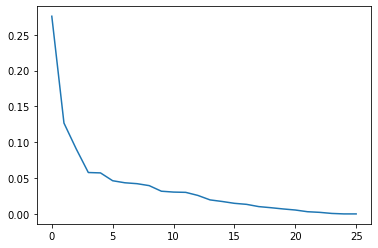

In [154]:
plt.plot(pca.explained_variance_ratio_)

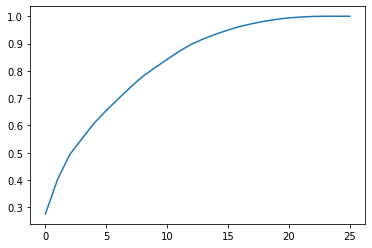

In [155]:
plt.plot(pca.explained_variance_ratio_.cumsum())

In [159]:
pd.DataFrame(pca.components_,
             columns=X_std.columns,
             index=[f'PC{n+1}' for n in range(X_pca.shape[1])]
            )

,impressions,engagements,engagement_rate,retweets,replies,likes,user_profile_clicks,url_clicks,hashtag_clicks,detail_expands,...,is_unicode,hour,dom,dow,at_tweet,has_newlines,num_lines,num_mentions,has_hashtag,followers
PC1,0.347675,0.345050,0.151317,0.236223,0.308024,0.343851,0.338142,0.111597,0.011322,0.311115,...,0.015912,0.005864,-0.005953,-0.014736,-0.053957,0.041329,0.040672,-0.051623,0.005203,-0.019326
PC2,0.012115,-0.116265,-0.076738,0.088081,-0.044155,-0.003995,-0.048756,0.084073,0.217785,0.028303,...,0.162124,0.008548,-0.114009,-0.006877,-0.418997,0.318230,0.302669,-0.332472,0.248701,-0.036590
PC3,-0.072627,0.004057,0.151908,-0.056372,0.008456,-0.014056,0.000757,0.066053,0.069089,-0.059745,...,-0.049626,0.090178,-0.039531,0.016217,0.326415,0.235559,0.244725,0.364181,0.025343,-0.123783
PC4,-0.010535,0.063262,0.128221,-0.109039,-0.018831,-0.023436,-0.011377,-0.015106,0.428626,-0.039486,...,-0.077964,-0.341231,0.267796,0.389861,0.076920,0.033773,0.055042,0.031063,0.423261,0.465691
PC5,-0.012009,0.086220,-0.043319,-0.200157,-0.043909,0.012483,0.019657,-0.072381,0.329857,-0.062473,...,-0.049250,0.075512,-0.567260,0.175043,-0.017939,-0.292345,-0.273245,0.013048,0.321493,-0.397702
PC6,0.007019,0.004103,0.061049,0.019301,-0.128775,-0.019110,0.044071,0.583343,0.007375,-0.125579,...,0.051860,-0.318301,-0.202860,-0.020363,0.092597,0.156254,0.118785,0.084746,0.046320,-0.255127
PC7,0.073905,-0.110191,-0.147410,0.191913,0.091281,0.025645,0.028675,-0.116544,-0.048323,0.106678,...,0.351513,-0.321748,0.003150,0.311931,-0.002117,-0.348578,-0.302326,0.040294,-0.138378,0.033583
PC8,-0.035689,-0.030024,0.167701,0.028112,-0.017278,-0.027884,-0.019784,0.285270,0.125338,-0.021464,...,-0.475496,0.316403,0.159938,-0.269456,-0.095386,-0.254328,-0.346889,-0.089104,0.137293,0.181112
PC9,0.027375,-0.020417,-0.379329,0.080566,0.095892,0.056124,0.068854,-0.174321,0.372501,0.040890,...,0.372655,0.217044,0.182380,-0.469327,0.165775,-0.019702,0.038059,0.140624,0.281344,-0.043055
PC10,0.076013,-0.202368,-0.241218,0.558233,0.145365,0.087197,-0.001178,0.232584,0.088936,0.152999,...,-0.256868,0.221919,-0.098894,0.327071,0.128564,0.053003,0.009334,0.138849,0.060244,0.006778


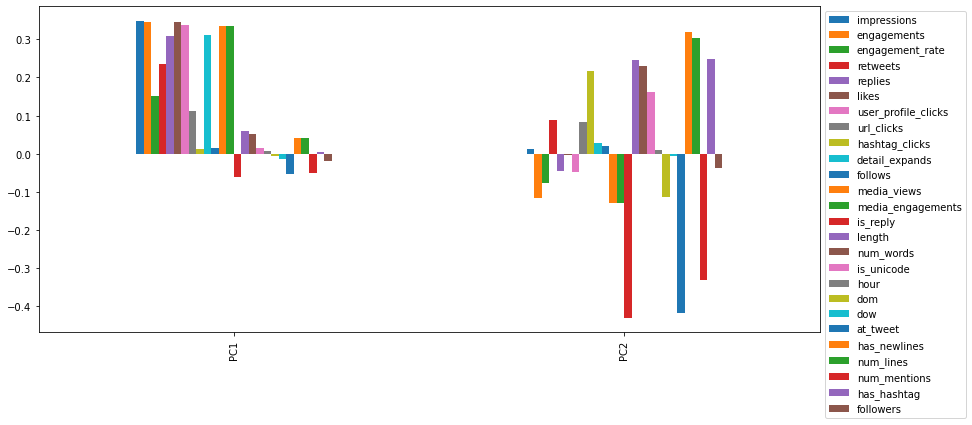

In [162]:
fig, ax = plt.subplots(figsize=(14,6))
(pd.DataFrame(pca.components_,
              columns=X_std.columns,
              index=[f'PC{n+1}' for n in range(X_pca.shape[1])]
            )
 .iloc[:2]
 .plot.bar(ax=ax)
 .legend(bbox_to_anchor=(1,1))
)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

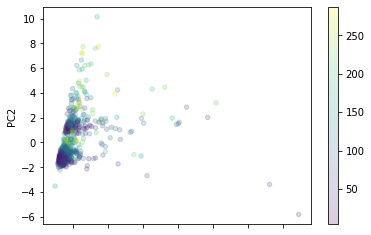

In [165]:
(pd.DataFrame(X_pca, columns=[f'PC{n+1}' for n in range(X_pca.shape[1])]
 .loc[lambda df_: df_.index != 675]
 .plot.scatter(x='PC1',
               y='PC2',
               alpha=.2,
               c=tweak_twit(df).loc[lambda df_: df_.index != 675].length,
               cmap='viridis'
              )
)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

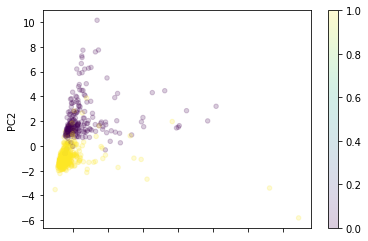

In [166]:
(pd.DataFrame(X_pca, columns=[f'PC{n+1}' for n in range(X_pca.shape[1])])
 .loc[lambda df_: df_.index != 675]
 .plot.scatter(x='PC1',
               y='PC2',
               alpha=.2,
               c=tweak_twit(df).loc[lambda df_: df_.index != 675].is_reply,
               cmap='viridis'
              )
)

In [164]:
(tweak_twit(df)
 .query('impressions > 50000')
)

,Tweet_text,time,impressions,engagements,engagement_rate,retweets,replies,likes,user_profile_clicks,url_clicks,...,is_unicode,hour,dom,dow,at_tweet,has_newlines,num_lines,num_mentions,has_hashtag,followers
675,@JamesClear Bought a mirrorless SLR to use as ...,2020-11-10 21:53:00+00:00,55205.0,18377.0,0.332887,8.0,28.0,248.0,421.0,85.0,...,False,21,10,1,True,False,1,1,False,6031.382639


In [167]:
clus = cluster.AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')
clus.fit(X_std)

AgglomerativeClustering(n_clusters=8)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

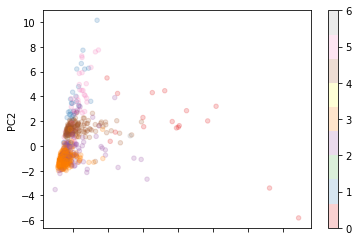

In [169]:
labels = pd.Series(clus.fit_predict(X_std))
(pd.DataFrame(X_pca, columns=[f'PC{n+1}' for n in range(X_pca.shape[1])])
 .loc[lambda df_: df_.index != 675]
 .plot.scatter(x='PC1',
               y='PC2',
               alpha=.2,
               c=labels.loc[lambda df_: df_.index != 675],
               cmap='Set1'
              )
)